In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
CEsample = pd.read_csv('CEsample1.csv')
CEsample['LogTotalExpLastQ'] = np.log(data.loc[:, 'TotalExpLastQ'])
CEsample.head()

,CEindex,TotalExpLastQ,LogTotalExpLastQ
0,1,27688.0501,10.228756
1,2,4891.4000,8.495234
2,3,10513.2501,9.260392
3,4,11577.0000,9.356776
4,5,17383.8000,9.763294


In [28]:
def gibbs_normal(input, S, seed):
    np.random.seed(seed)
    ybar = np.mean(input['y'])
    n = len(input['y'])
    para = np.zeros(shape=(S,2))
    phi = input['phi_init']

    for s in range(0, S-1):
        mu1 = (input['mu_0']/(input['sigma_0'] ** 2) + n*phi*ybar)/ \
        (1/(input['sigma_0'] ** 2) + n * phi)
        sigma1 = np.sqrt(1/(1/(input['sigma_0'] ** 2) + n*phi))
        mu = np.random.normal(mu1, sigma1, 1)
        alpha1 = input['alpha'] + n/2
        beta1 = input['beta'] + np.sum((input['y'] - mu) ** 2)/2
        phi = np.random.gamma(alpha1, beta1, 1)
        para[s] = [mu, phi]

    return para

In [29]:
y = CEsample.LogTotalExpLastQ
mu_0 = 5
sigma_0 = 1
alpha = 1
beta = 1
phi_init = 1

input = {'y': y, 'mu_0': mu_0, 'sigma_0': sigma_0, 'alpha': alpha, \
       'beta': beta, 'phi_init': phi_init}

output = gibbs_normal(input, S = 10000, seed = 123)

In [32]:
np.quantile(output[:, 0], 0.025)

8.74822753203191

In [33]:
np.quantile(output[:, 0], 0.975)

8.74824542530274

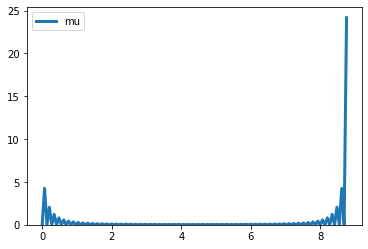

In [34]:
sns.distplot(output[:, 0], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'mu')

In [35]:
np.quantile(output[:, 1], 0.025)

7447676.106139826

In [36]:
np.quantile(output[:, 1], 0.975)

7980678.810445105